In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa 
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
def create_spec(y, sr, w, i): 
    """
    Creates and saves a spectogram of the loaded audio file.
    """
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    fig, ax = plt.subplots(figsize=(10,5))
    img = librosa.display.specshow(S_db, 
                                x_axis='time',
                                y_axis='log',
                                ax = ax)
    # Colorbar removed for consistency 
    # fig.colorbar(img, ax=ax, format=f'%0.2f')
    img_name = './Spectograms/' + w + '/sample' + str(i+1) + '.png'
    plt.savefig(img_name)
    plt.close

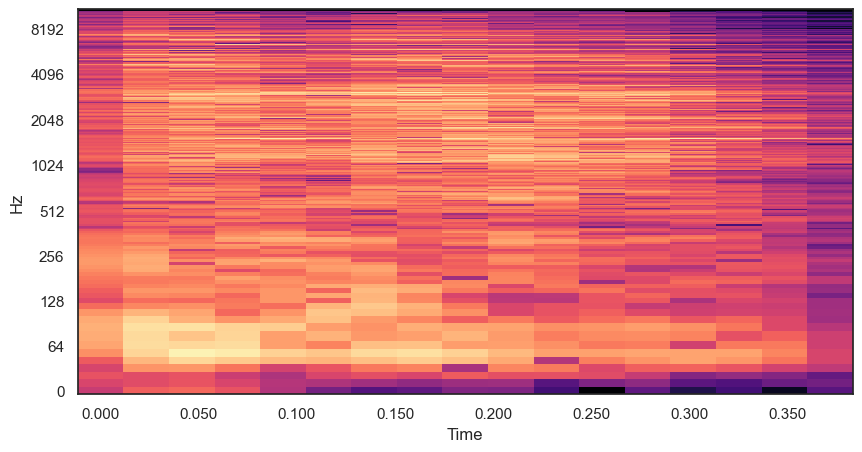

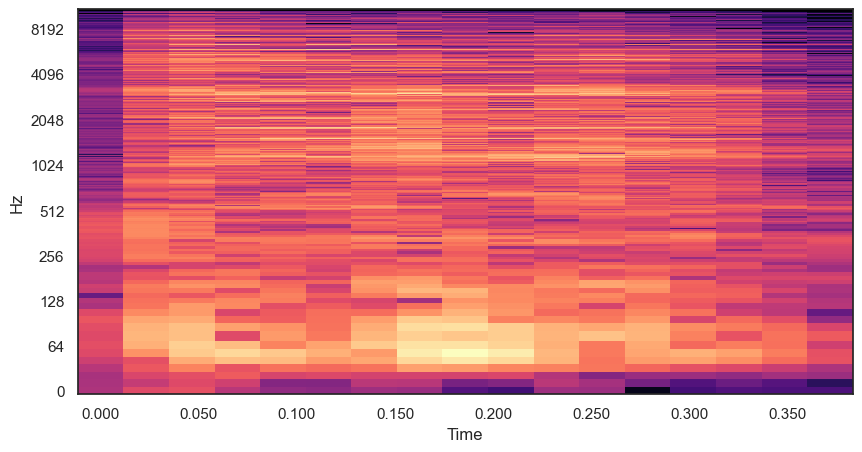

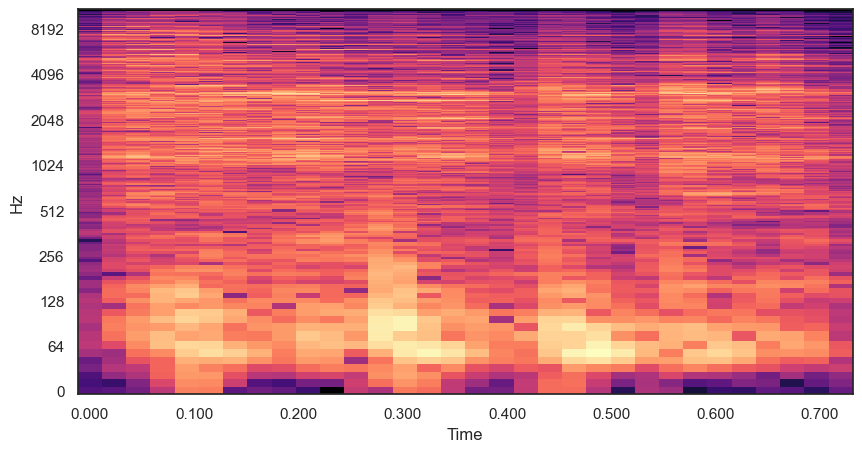

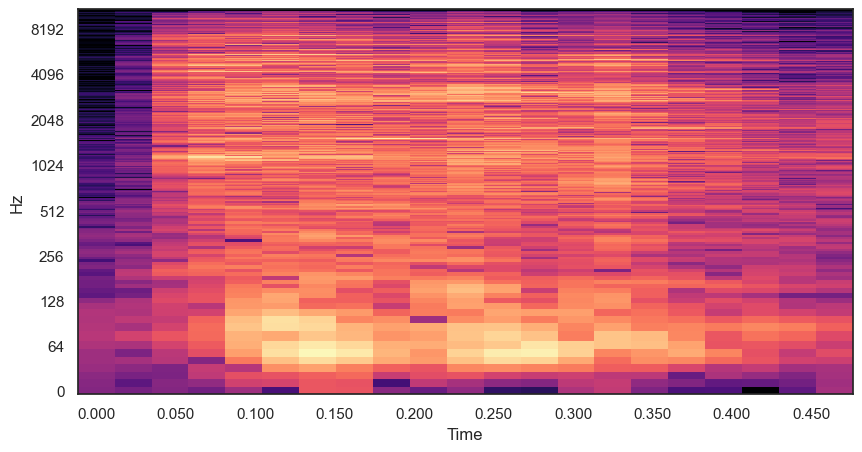

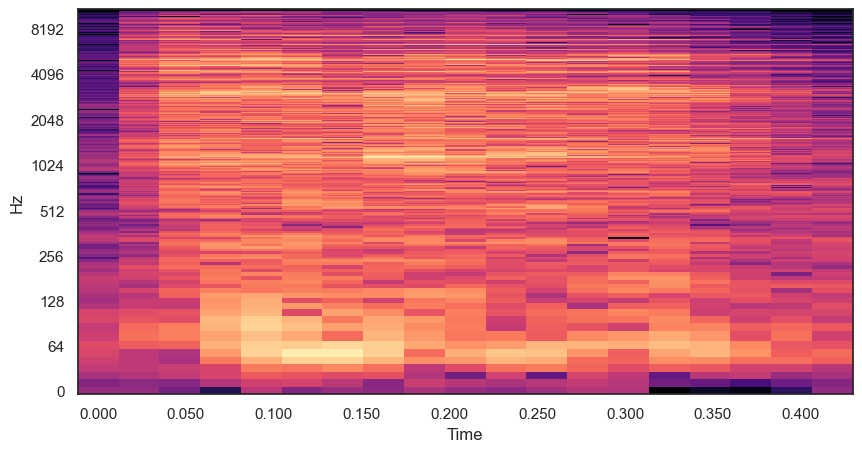

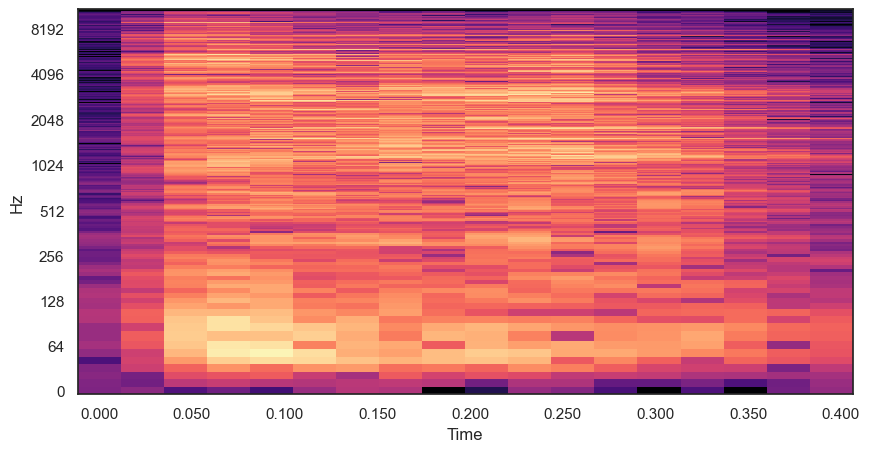

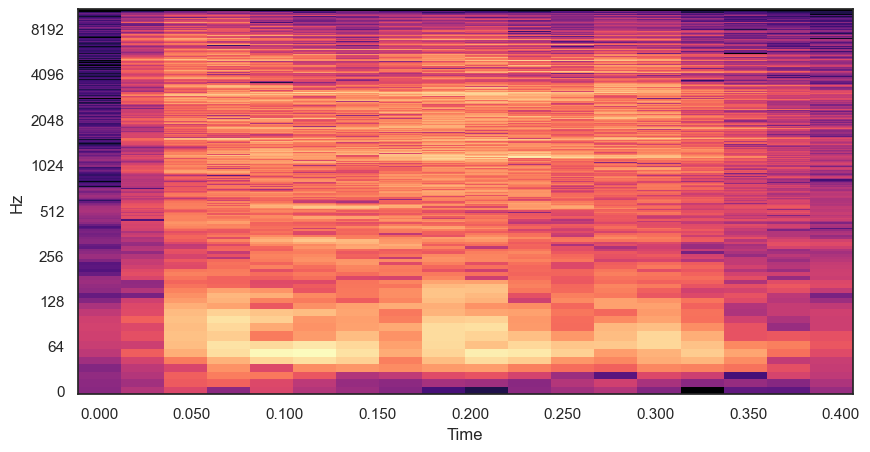

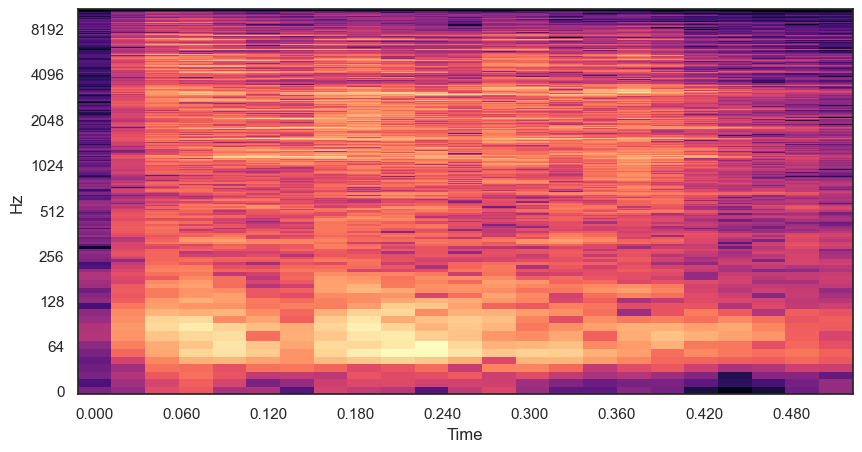

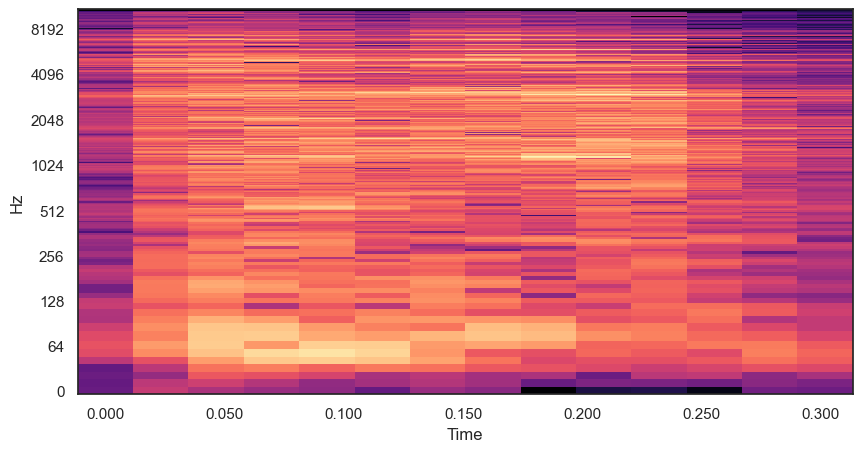

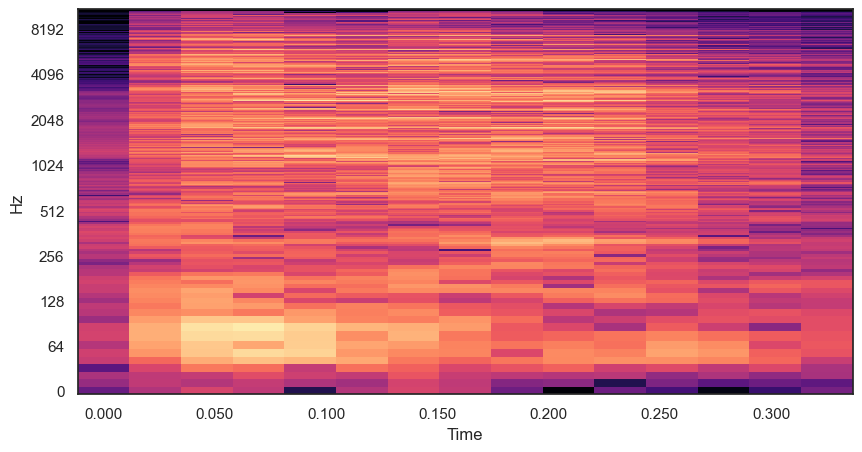

In [3]:
for w in ['20kg', '40kg']:
    folder_name = './TrimSounds/' + w + '/*.wav'
    audio_files = glob(folder_name)
    for i in range(len(audio_files)):
        y, sr = librosa.load(audio_files[i])
        create_spec(y, sr, w, i)